# Question 1: Extracting Tesla Stock Data Using yfinance

In [60]:
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)

# Normalize 'Close' column
scaler = MinMaxScaler()
tesla_data['Normalized_Close'] = scaler.fit_transform(tesla_data[['Close']])

tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Normalized_Close
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,0.001319
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,0.001309
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,0.001004
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,0.000554
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,0.000051


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [61]:
import requests
from bs4 import BeautifulSoup
from io import StringIO

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')
tesla_revenue = pd.read_html(StringIO(str(tables[0])))[0]

# Clean and normalize 'Revenue' column
tesla_revenue.columns = ['Year', 'Revenue']
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Year'].astype(str) + '-12-31')
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tesla_revenue['Normalized_Revenue'] = scaler.fit_transform(tesla_revenue[['Revenue']])

tesla_revenue.tail()


,Year,Revenue,Date,Normalized_Revenue
8,2013,2013.0,2013-12-31,0.035393
9,2012,413.0,2012-12-31,0.005604
10,2011,204.0,2011-12-31,0.001713
11,2010,117.0,2010-12-31,0.000093
12,2009,112.0,2009-12-31,0.000000


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [62]:
# Get GameStop stock data
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="max")
gme_data.reset_index(inplace=True)

# Normalize 'Close' column
gme_data['Normalized_Close'] = scaler.fit_transform(gme_data[['Close']])

gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Normalized_Close
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0,0.012209
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0,0.012111
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0,0.012014
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0,0.011233
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0,0.011867


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [64]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.find_all('table')
gme_revenue = pd.read_html(StringIO(str(tables[0])))[0]

# Clean 'Revenue' column
gme_revenue.columns = ['Year', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Year'].astype(str) + '-12-31')
gme_revenue.drop('Year', axis=1, inplace=True)

# Normalize 'Revenue' column
gme_revenue['Normalized_Revenue'] = scaler.fit_transform(gme_revenue[['Revenue']])

gme_revenue.tail()


,Revenue,Date,Normalized_Revenue
11,8806.0,2009-12-31,0.903347
12,7094.0,2008-12-31,0.681240
13,5319.0,2007-12-31,0.450960
14,3092.0,2006-12-31,0.162039
15,1843.0,2005-12-31,0.000000


# Question 5 - Tesla Stock and Revenue Dashboard

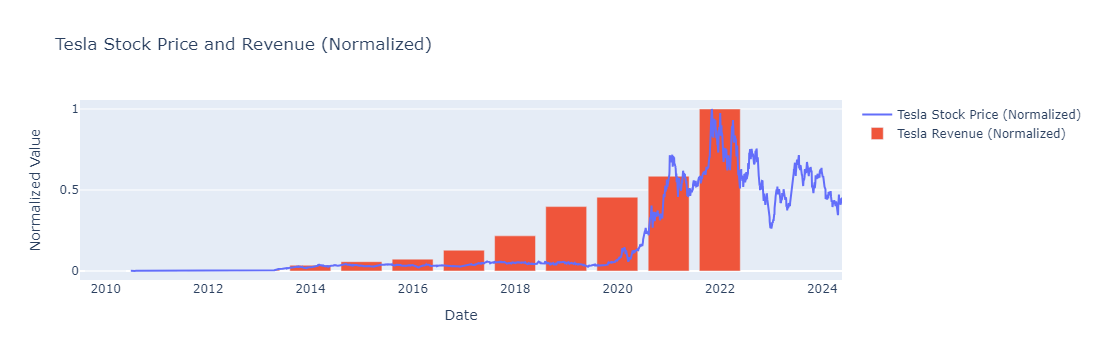

In [51]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=tesla_stock_data['Date'], y=tesla_stock_data['Normalized_Close'], mode='lines', name='Tesla Stock Price (Normalized)'))
fig.add_trace(go.Bar(x=tesla_revenue['Date'], y=tesla_revenue['Normalized_Revenue'], name='Tesla Revenue (Normalized)'))

fig.update_layout(title='Tesla Stock Price and Revenue (Normalized)', xaxis_title='Date', yaxis_title='Normalized Value', barmode='group')

fig.show()


# Question 6 - GameStop Stock and Revenue Dashboard

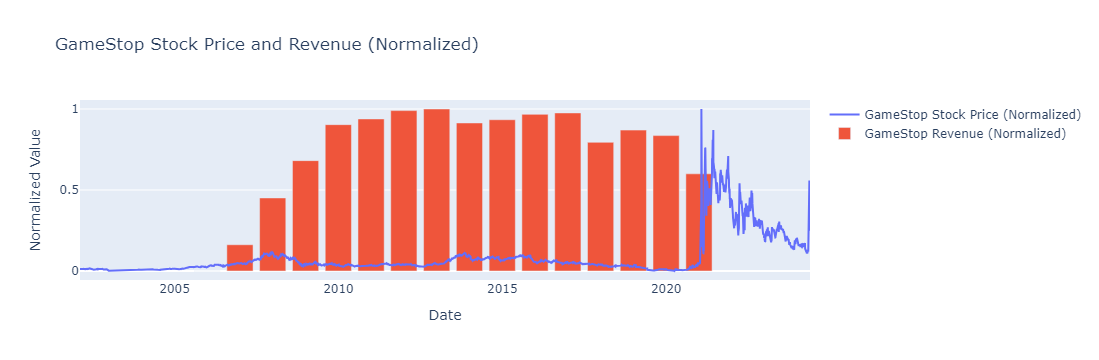

In [52]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=gamestop_stock_data['Date'], y=gamestop_stock_data['Normalized_Close'], mode='lines', name='GameStop Stock Price (Normalized)'))
fig.add_trace(go.Bar(x=gamestop_revenue['Date'], y=gamestop_revenue['Normalized_Revenue'], name='GameStop Revenue (Normalized)'))

fig.update_layout(title='GameStop Stock Price and Revenue (Normalized)', xaxis_title='Date', yaxis_title='Normalized Value', barmode='group')

fig.show()
